In [8]:
import numpy as np
import librosa
import scipy.stats as stats


FRAME_LENGTH = 2048
HOP_LENGTH = 512
EXPECTED_SAMPLE_RATE = 48000


def estimate_snr(audio, sample_rate):
    if sample_rate != EXPECTED_SAMPLE_RATE:
        raise ValueError(f"Sample rate {sample_rate} does not match the expected rate of {EXPECTED_SAMPLE_RATE} Hz")

    frames = librosa.util.frame(audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

    snr_values = []

    for frame in frames.T:
        gamma_params = stats.gamma.fit(np.abs(frame))

        mean = np.mean(frame)
        std_dev = np.std(frame)
        noise_power = std_dev ** 2

        signal_power = gamma_params[1] ** 2

        snr_frame = 10 * np.log10(signal_power / noise_power)
        snr_values.append(snr_frame)

    return np.mean(snr_values)


def load_audio(file_path):
    signal, sample_rate = librosa.load(file_path, sr=None)
    return signal, sample_rate


def validate_audio_snr(audio_path):
    try:
        signal, sample_rate = load_audio(audio_path)

        snr = estimate_snr(signal, sample_rate)
        print(f"SNR estimate for {audio_path}: {snr:.2f} dB")
        return snr
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

In [7]:
# fpath = "data/audio_sample/noise.wav"
# validate_audio_snr(fpath)

SNR estimate for data/audio_sample/noise.wav: -75.05 dB


-75.05090647493

In [9]:
import os

snrs = []
labels = []

for f in os.listdir("data/audio_sample/clean"):
    if f.endswith(".wav"):
        fpath = os.path.join("data/audio_sample/clean", f)
        snr = validate_audio_snr(fpath)
        if snr is not None:
            snrs.append(snr)
            labels.append(1)

for f in os.listdir("data/audio_sample/noise"):
    if f.endswith(".wav"):
        fpath = os.path.join("data/audio_sample/noise", f)
        snr = validate_audio_snr(fpath)
        if snr is not None:
            snrs.append(snr)
            labels.append(0)

SNR estimate for data/audio_sample/clean\HOHDaZ3BLxY_00000074.wav: -231.63 dB
SNR estimate for data/audio_sample/clean\p232_181.wav: -127.81 dB
SNR estimate for data/audio_sample/clean\p232_219.wav: -117.01 dB
SNR estimate for data/audio_sample/clean\p232_258.wav: -119.66 dB
SNR estimate for data/audio_sample/clean\p232_343.wav: -139.66 dB
SNR estimate for data/audio_sample/clean\p257_042.wav: -138.68 dB
SNR estimate for data/audio_sample/clean\p257_149.wav: -210.05 dB
SNR estimate for data/audio_sample/clean\p257_207.wav: -152.58 dB
SNR estimate for data/audio_sample/clean\p257_212.wav: -137.11 dB
SNR estimate for data/audio_sample/clean\p257_248.wav: -145.56 dB
SNR estimate for data/audio_sample/clean\p257_254.wav: -110.26 dB
SNR estimate for data/audio_sample/noise\HOHDaZ3BLxY_00000022.wav: -75.05 dB
SNR estimate for data/audio_sample/noise\p232_181_n.wav: -41.10 dB
SNR estimate for data/audio_sample/noise\p232_219_n.wav: -48.94 dB
SNR estimate for data/audio_sample/noise\p232_258_n

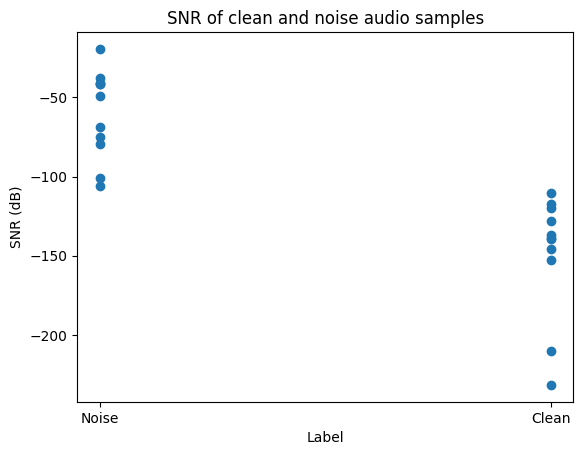

In [11]:
import matplotlib.pyplot as plt

# plt labels, snrs
plt.scatter(labels, snrs)
plt.xlabel("Label")
plt.ylabel("SNR (dB)")
plt.title("SNR of clean and noise audio samples")
plt.xticks([0, 1], ["Noise", "Clean"])
plt.show()

In [18]:
import numpy as np

def wada_snr(wav):
    # Direct blind estimation of the SNR of a speech signal.
    #
    # Paper on WADA SNR:
    #   http://www.cs.cmu.edu/~robust/Papers/KimSternIS08.pdf
    #
    # This function was adapted from this matlab code:
    #   https://labrosa.ee.columbia.edu/projects/snreval/#9

    # init
    eps = 1e-10
    # next 2 lines define a fancy curve derived from a gamma distribution -- see paper
    db_vals = np.arange(-20, 101)
    g_vals = np.array([0.40974774, 0.40986926, 0.40998566, 0.40969089, 0.40986186, 0.40999006, 0.41027138, 0.41052627, 0.41101024, 0.41143264, 0.41231718, 0.41337272, 0.41526426, 0.4178192 , 0.42077252, 0.42452799, 0.42918886, 0.43510373, 0.44234195, 0.45161485, 0.46221153, 0.47491647, 0.48883809, 0.50509236, 0.52353709, 0.54372088, 0.56532427, 0.58847532, 0.61346212, 0.63954496, 0.66750818, 0.69583724, 0.72454762, 0.75414799, 0.78323148, 0.81240985, 0.84219775, 0.87166406, 0.90030504, 0.92880418, 0.95655449, 0.9835349 , 1.01047155, 1.0362095 , 1.06136425, 1.08579312, 1.1094819 , 1.13277995, 1.15472826, 1.17627308, 1.19703503, 1.21671694, 1.23535898, 1.25364313, 1.27103891, 1.28718029, 1.30302865, 1.31839527, 1.33294817, 1.34700935, 1.3605727 , 1.37345513, 1.38577122, 1.39733504, 1.40856397, 1.41959619, 1.42983624, 1.43958467, 1.44902176, 1.45804831, 1.46669568, 1.47486938, 1.48269965, 1.49034339, 1.49748214, 1.50435106, 1.51076426, 1.51698915, 1.5229097 , 1.528578  , 1.53389835, 1.5391211 , 1.5439065 , 1.54858517, 1.55310776, 1.55744391, 1.56164927, 1.56566348, 1.56938671, 1.57307767, 1.57654764, 1.57980083, 1.58304129, 1.58602496, 1.58880681, 1.59162477, 1.5941969 , 1.59693155, 1.599446  , 1.60185011, 1.60408668, 1.60627134, 1.60826199, 1.61004547, 1.61192472, 1.61369656, 1.61534074, 1.61688905, 1.61838916, 1.61985374, 1.62135878, 1.62268119, 1.62390423, 1.62513143, 1.62632463, 1.6274027 , 1.62842767, 1.62945532, 1.6303307 , 1.63128026, 1.63204102])

    # peak normalize, get magnitude, clip lower bound
    wav = np.array(wav)
    wav = wav / abs(wav).max()
    abs_wav = abs(wav)
    abs_wav[abs_wav < eps] = eps

    # calcuate statistics
    # E[|z|]
    v1 = max(eps, abs_wav.mean())
    # E[log|z|]
    v2 = np.log(abs_wav).mean()
    # log(E[|z|]) - E[log(|z|)]
    v3 = np.log(v1) - v2

    # table interpolation
    wav_snr_idx = None
    if any(g_vals < v3):
        wav_snr_idx = np.where(g_vals < v3)[0].max()
    # handle edge cases or interpolate
    if wav_snr_idx is None:
        wav_snr = db_vals[0]
    elif wav_snr_idx == len(db_vals) - 1:
        wav_snr = db_vals[-1]
    else:
        wav_snr = db_vals[wav_snr_idx] + \
            (v3-g_vals[wav_snr_idx]) / (g_vals[wav_snr_idx+1] - \
            g_vals[wav_snr_idx]) * (db_vals[wav_snr_idx+1] - db_vals[wav_snr_idx])

    # Calculate SNR
    dEng = sum(wav**2)
    dFactor = 10**(wav_snr / 10)
    dNoiseEng = dEng / (1 + dFactor) # Noise energy
    dSigEng = dEng * dFactor / (1 + dFactor) # Signal energy
    snr = 10 * np.log10(dSigEng / dNoiseEng)

    return snr

In [21]:
import os

snrs = []
labels = []

for f in os.listdir("data/audio_sample/clean"):
    if f.endswith(".wav"):
        fpath = os.path.join("data/audio_sample/clean", f)
        snr = wada_snr(librosa.load(fpath, sr=None)[0])
        print(f"SNR for {f}: {snr:.2f} dB")
        if snr is not None:
            snrs.append(snr)
            labels.append(1)

for f in os.listdir("data/audio_sample/noise"):
    if f.endswith(".wav"):
        fpath = os.path.join("data/audio_sample/noise", f)
        snr = wada_snr(librosa.load(fpath, sr=None)[0])
        print(f"SNR for {f}: {snr:.2f} dB")
        if snr is not None:
            snrs.append(snr)
            labels.append(0)

SNR for HOHDaZ3BLxY_00000074.wav: 34.19 dB
SNR for p232_181.wav: 60.23 dB
SNR for p232_219.wav: 25.28 dB
SNR for p232_258.wav: 29.01 dB
SNR for p232_343.wav: 37.67 dB
SNR for p257_042.wav: 41.56 dB
SNR for p257_149.wav: 31.82 dB
SNR for p257_207.wav: 25.20 dB
SNR for p257_212.wav: 32.92 dB
SNR for p257_248.wav: 29.48 dB
SNR for p257_254.wav: 22.11 dB
SNR for HOHDaZ3BLxY_00000022.wav: 10.35 dB
SNR for p232_181_n.wav: 6.43 dB
SNR for p232_219_n.wav: 8.01 dB
SNR for p232_258_n.wav: -0.66 dB
SNR for p232_343_n.wav: 6.75 dB
SNR for p257_042_n.wav: 6.38 dB
SNR for p257_149_n.wav: 15.28 dB
SNR for p257_207_n.wav: 3.46 dB
SNR for p257_212_n.wav: 16.80 dB
SNR for p257_248_n.wav: 20.17 dB
SNR for p257_254_n.wav: 8.50 dB


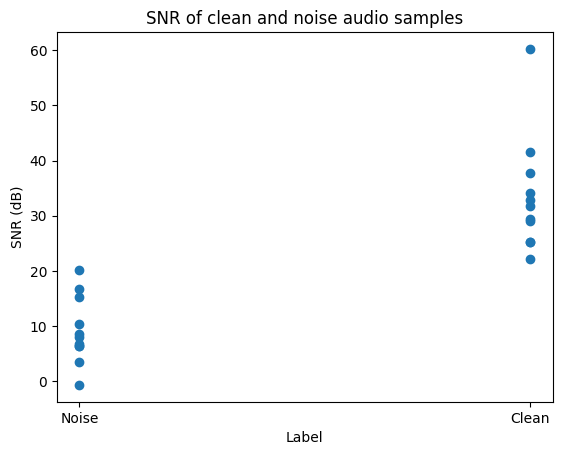

In [20]:
import matplotlib.pyplot as plt

# plt labels, snrs
plt.scatter(labels, snrs)
plt.xlabel("Label")
plt.ylabel("SNR (dB)")
plt.title("SNR of clean and noise audio samples")
plt.xticks([0, 1], ["Noise", "Clean"])
plt.show()

In [25]:
import librosa
import numpy as np


def estimate_snr(audio, frame_length=2048, hop_length=512, noise_threshold=0.02):
    try:
        frames = librosa.util.frame(
            audio, frame_length=frame_length, hop_length=hop_length
        )
        rms_values = np.sqrt(np.mean(frames**2, axis=0))
        noise_frames = rms_values < noise_threshold
        signal_power = np.mean(rms_values[~noise_frames] ** 2)
        noise_power = np.mean(rms_values[noise_frames] ** 2)
        snr = 10 * np.log10(signal_power / noise_power)
        if snr != snr: # snr is nan
            return 0
        return snr
    except Exception as e:
        # print(e)
        return 0


In [26]:
import os

snrs = []
labels = []

for f in os.listdir("data/audio_sample/clean"):
    if f.endswith(".wav"):
        fpath = os.path.join("data/audio_sample/clean", f)
        snr = estimate_snr(librosa.load(fpath, sr=None)[0])
        print(f"SNR for {f}: {snr:.2f} dB")
        if snr is not None:
            snrs.append(snr)
            labels.append(1)

for f in os.listdir("data/audio_sample/noise"):
    if f.endswith(".wav"):
        fpath = os.path.join("data/audio_sample/noise", f)
        snr = estimate_snr(librosa.load(fpath, sr=None)[0])
        print(f"SNR for {f}: {snr:.2f} dB")
        if snr is not None:
            snrs.append(snr)
            labels.append(0)

SNR for HOHDaZ3BLxY_00000074.wav: 22.59 dB
SNR for p232_181.wav: 22.76 dB
SNR for p232_219.wav: 20.02 dB
SNR for p232_258.wav: 21.17 dB
SNR for p232_343.wav: 22.20 dB
SNR for p257_042.wav: 23.46 dB
SNR for p257_149.wav: 20.24 dB
SNR for p257_207.wav: 18.30 dB
SNR for p257_212.wav: 18.99 dB
SNR for p257_248.wav: 20.89 dB
SNR for p257_254.wav: 17.39 dB
SNR for HOHDaZ3BLxY_00000022.wav: 22.07 dB
SNR for p232_181_n.wav: 0.00 dB
SNR for p232_219_n.wav: 12.76 dB
SNR for p232_258_n.wav: 14.57 dB
SNR for p232_343_n.wav: 12.39 dB
SNR for p257_042_n.wav: 14.25 dB
SNR for p257_149_n.wav: 14.58 dB
SNR for p257_207_n.wav: 12.30 dB
SNR for p257_212_n.wav: 16.16 dB
SNR for p257_248_n.wav: 17.40 dB
SNR for p257_254_n.wav: 11.54 dB


d:\Projects\SE-datapipeline\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Projects\SE-datapipeline\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


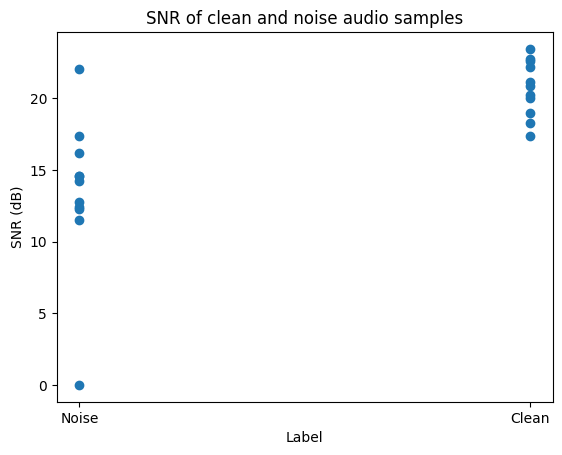

In [27]:
import matplotlib.pyplot as plt

# plt labels, snrs
plt.scatter(labels, snrs)
plt.xlabel("Label")
plt.ylabel("SNR (dB)")
plt.title("SNR of clean and noise audio samples")
plt.xticks([0, 1], ["Noise", "Clean"])
plt.show()

In [ ]:
!git clone https://github.com/msalhab96/SNR-Estimation-Using-Deep-Learning